# Project: TMDb Data Analysis

Author: Can Bekleyici

Dataset overview: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

## Questions
The presented research provides an in-depth analysis of the TMDb Movie Database by giving answers to the following Questions:
<br>

<ul>
<li>Q1: Which features or properties can be associated with high ratings?</li>

<li>Q2: Do higher budgetary investments lead to higher roi succes rates?</li>

<li>Q3: Does the title length affect the rating or success of a movie?</li>

<li>Q4: Do higher budget movies achieve higher ratings?</li>

<li>Q5: Do higher ratings return higher success (ROI)?</li>

<li>Q6: What trends can be derived from the dataset regarding the movie runtime, success and movie quality (vote_average)?</li></ul>

## Getting an Overview of the Dataset

Before starting off with the analysis, I quickly assessed the dataset and it's properties.

In [382]:
# load the dataset
import pandas as pd
import numpy as np

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Assessing the Dataset

In [383]:
# inspecting the structure of the dataset
df.shape

(10866, 21)

In [384]:
# general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [385]:
# identifying amount of null-values in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [386]:
# checking for duplicates
sum(df.duplicated())

1

The dataset has <b>10866 entries with 21 columns</b>. Some of the columns have <b>missing values</b>. While some of the affected columns were dropped eventually, others were fixed in the cleaning process. There is <b>1 duplicated row</b> in the dataset.

I got a look at the time range of the given movie database:

In [387]:
## Time range of the dataset?
df['release_year'].describe()

count    10866.000000
mean      2001.322658
std         12.812941
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

So the movies included in the dataset have been released <b>between the years 1960 and 2015</b>.

Checking the other columns too:

In [388]:
# Description of Budget
df['budget_adj'].describe()

count    1.086600e+04
mean     1.755104e+07
std      3.430616e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.085325e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

In [389]:
# Description of Revenue
df['revenue_adj'].describe()

count    1.086600e+04
mean     5.136436e+07
std      1.446325e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.369710e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [390]:
# Description of Runtime
df['runtime'].describe()

count    10866.000000
mean       102.070863
std         31.381405
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

That means, the <b>budget, revenue and runtime</b> columns all have <b>zero values in their entries</b>. Further adjustments to these values were made at a later point.

Having a look at the value ranges of <b>popularity and vote_average</b>:

In [391]:
## popularity values
df['popularity'].describe()

count    10866.000000
mean         0.646441
std          1.000185
min          0.000065
25%          0.207583
50%          0.383856
75%          0.713817
max         32.985763
Name: popularity, dtype: float64

The values for <b>popularity</b> in this dataset <b>range from 0.000065 to 32.985763</b> while most movies are having a popularity rating below 1.

In [392]:
## vote_average values
df['vote_average'].describe()

count    10866.000000
mean         5.974922
std          0.935142
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

The values for <b>average</b> votes range in this dataset <b>range from 1.5 to 9.2</b>, assuming the full scaling ranges from 0 to 10.

## Cleaning the dataset

First, I did start off with dropping the columns which were irrelevant to our formulated questions:

In [393]:
# dropping irrelevant columns (budget, revenue, and release_date are dropped because we will use budget_adj, revenue_adj, and release_year instead)
df.drop(['id', 'imdb_id', 'budget', 'revenue', 'director', 'genres', 'production_companies', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'vote_count'], axis=1, inplace=True)

# confirm changes
df.head(1)

,popularity,original_title,runtime,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,6.5,2015,1.379999e+08,1.392446e+09


and dropped the duplicates:

In [394]:
# check again for duplicates
df.duplicated().sum()

1

In [395]:
# drop the duplicate
df.drop_duplicates(inplace=True)

# confirm deduplication
df.duplicated().sum()

0

Also, I checked for null-values and assess further actions

In [396]:
# check again for null-values
df.isnull().sum()

popularity        0
original_title    0
runtime           0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

No actions were needed here. There were <b>no columns with null-values</b> left, because they have already been dropped.

## Replacing zero values with NaN
If a distortion of the dataset is to be avoided, the zero values of budget, revenue, and runtime should be replaced with Null values.

In [397]:
# Replace 0 with NaN
df['runtime'] = df['runtime'].replace(0, np.NaN)
df['budget_adj'] = df['budget_adj'].replace(0, np.NaN)
df['revenue_adj'] = df['revenue_adj'].replace(0, np.NaN)

In [398]:
# Confirm the replacements
df.isnull().sum()

popularity           0
original_title       0
runtime             31
vote_average         0
release_year         0
budget_adj        5696
revenue_adj       6016
dtype: int64

For further analysis, the significant amount of NaNs in the budget and revenue were taken to consideration.

## Creating the success(roi), title length, and rating group columns:
Before saving the cleaned dataframe, I implemented a new column to evaluate the monetary success of a movie. In this case, the success is the return on investment (ROI) percentage derived from the revenue outcome in relation to the budgetary investment. I worked with this kpi for the further analysis, because it is more meaningful in terms of financing decisions than budget or revenue alone.

In [399]:
# new column 'success'
df['success'] = (df['revenue_adj'] - df['budget_adj']) / df['budget_adj']

In [400]:
# inspect the new dataframe
df.head()

,popularity,original_title,runtime,vote_average,release_year,budget_adj,revenue_adj,success
0,32.985763,Jurassic World,124.0,6.5,2015,1.379999e+08,1.392446e+09,9.090192
1,28.419936,Mad Max: Fury Road,120.0,7.1,2015,1.379999e+08,3.481613e+08,1.522909
2,13.112507,Insurgent,119.0,6.3,2015,1.012000e+08,2.716190e+08,1.683984
3,11.173104,Star Wars: The Force Awakens,136.0,7.5,2015,1.839999e+08,1.902723e+09,9.340891
4,9.335014,Furious 7,137.0,7.3,2015,1.747999e+08,1.385749e+09,6.927628


In [401]:
# assess the success columns
df['success'].describe()

count    3.854000e+03
mean     2.970412e+02
std      1.644256e+04
min     -9.999998e-01
25%     -1.234118e-01
50%      1.119690e+00
75%      3.210444e+00
max      1.018618e+06
Name: success, dtype: float64

The distribution off the succes/roi seemed a bit odd. I dropped the extremely high enteries in order to not overaffect further calculations:

In [403]:
# assess the success peak
df[df['success'] >= 999]

,popularity,original_title,runtime,vote_average,release_year,budget_adj,revenue_adj,success
2449,0.934621,The Blair Witch Project,81.0,6.3,1999,32726.321165,3.246451e+08,9.919000e+03
3581,0.520430,"Love, Wedding, Marriage",90.0,5.3,2011,0.969398,1.335831e+03,1.377000e+03
3608,0.463510,From Prada to Nada,107.0,5.2,2011,90.154018,2.423495e+06,2.688072e+04
6179,0.132713,Into the Night,115.0,6.1,1985,231.096930,1.358201e+07,5.877093e+04
7447,1.120442,Paranormal Activity,86.0,6.1,2007,15775.028739,2.033462e+08,1.288939e+04
10495,0.772494,"The Karate Kid, Part II",113.0,5.8,1986,224.802924,2.289886e+08,1.018618e+06


In [404]:
# filter them out
df = df.query('success < 999')
# confirm
df[df['success'] >= 999]

,popularity,original_title,runtime,vote_average,release_year,budget_adj,revenue_adj,success


I also created the title length column, because I investigated possible dependencies with other properties in the analysis process:

In [405]:
# creating a column for titel length
df['tit_len'] = np.repeat(0, len(df.index))

# checking the new column
df.head(1)

,popularity,original_title,runtime,vote_average,release_year,budget_adj,revenue_adj,success,tit_len
0,32.985763,Jurassic World,124.0,6.5,2015,1.379999e+08,1.392446e+09,9.090192,0


In [406]:
# filling the values of tit_len, take only the main title before the ":"
for i in range(len(df['original_title'])):
    df.iloc[i, 8] = len(df.iloc[i, 1].split(":")[0])

and a column for rating categories:

In [407]:
# view the min, 25%, 50%, 75%, max vote_average values
df['vote_average'].describe()

count    3848.000000
mean        6.168737
std         0.795237
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

In [408]:
# bin edges to cut the data into groups
bin_edges = [1.5, 5.4, 6.0, 6.6, 9.2]

# labels for the rating categories
bin_names = ['low', 'mediocre', 'high', 'very_high']

In [409]:
# create rating categories
df['rating_cat'] = pd.cut(df['vote_average'], bin_edges, labels=bin_names)

# confirm the creation
df.head()

,popularity,original_title,runtime,vote_average,release_year,budget_adj,revenue_adj,success,tit_len,rating_cat
0,32.985763,Jurassic World,124.0,6.5,2015,1.379999e+08,1.392446e+09,9.090192,14,high
1,28.419936,Mad Max: Fury Road,120.0,7.1,2015,1.379999e+08,3.481613e+08,1.522909,7,very_high
2,13.112507,Insurgent,119.0,6.3,2015,1.012000e+08,2.716190e+08,1.683984,9,high
3,11.173104,Star Wars: The Force Awakens,136.0,7.5,2015,1.839999e+08,1.902723e+09,9.340891,9,very_high
4,9.335014,Furious 7,137.0,7.3,2015,1.747999e+08,1.385749e+09,6.927628,9,very_high


Saving the cleaned dataset for further analysis parts:

In [410]:
# save the changes to csv
df.to_csv('tmdb_movies_edited.csv', index=False)

## Exploration with Visuals

In [411]:
# load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set()

df = pd.read_csv('tmdb_movies_edited.csv')

First, I looked at the rating distribution

In [412]:
# Description of vote_average
df['vote_average'].describe()

count    3848.000000
mean        6.168737
std         0.795237
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

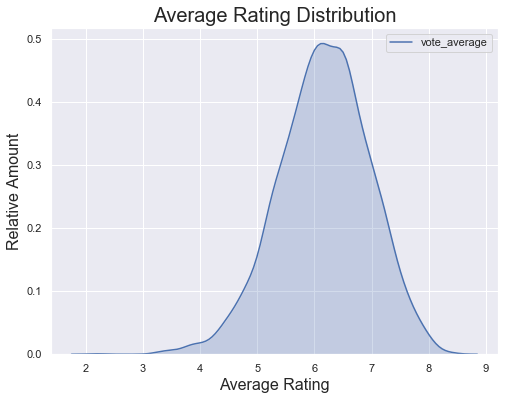

In [413]:
# Creating a density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(df['vote_average'], shade=True)
plt.title('Average Rating Distribution', fontdict={'fontsize': 20})
plt.xlabel('Average Rating', fontdict={'fontsize': 16})
plt.ylabel('Relative Amount', fontdict={'fontsize': 16});

The <b>median value</b> of all average ratings is <b>exactly 6.2</b>!


In the following, I analysed the dependencies of the Average Ratings:

### Q1 Which features or properties can be associated with high ratings?
I created scatterplot for runtime, popularity, budget_adj, and success in combination with the average rating to identify possible correlations:

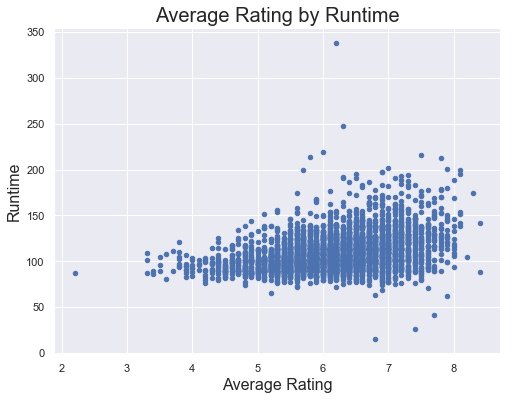

In [414]:
df.plot(y='runtime', x='vote_average', kind='scatter', figsize=(8, 6))
plt.title('Average Rating by Runtime', fontdict={'fontsize': 20})
plt.xlabel('Average Rating', fontdict={'fontsize': 16})
plt.ylabel('Runtime', fontdict={'fontsize': 16});

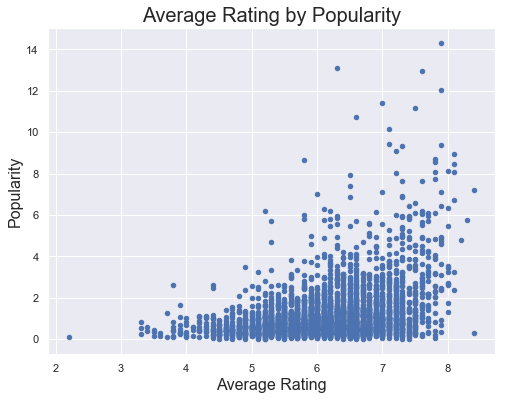

In [415]:
df_pop = df.query('popularity <= 15') # excluding the outliers
df_pop.plot(y='popularity', x='vote_average', kind='scatter', figsize=(8, 6))
plt.title('Average Rating by Popularity', fontdict={'fontsize': 20})
plt.xlabel('Average Rating', fontdict={'fontsize': 16})
plt.ylabel('Popularity', fontdict={'fontsize': 16});

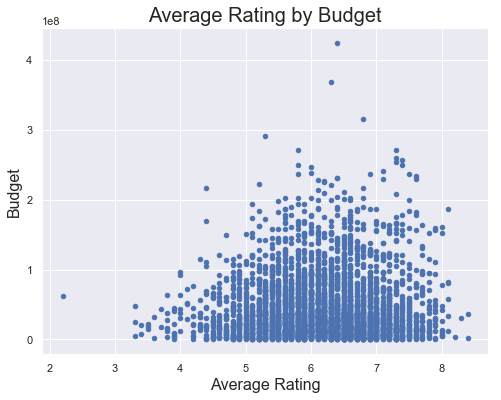

In [416]:
df.plot(y='budget_adj', x='vote_average', kind='scatter', figsize=(8, 6))
plt.title('Average Rating by Budget', fontdict={'fontsize': 20})
plt.xlabel('Average Rating', fontdict={'fontsize': 16})
plt.ylabel('Budget', fontdict={'fontsize': 16});

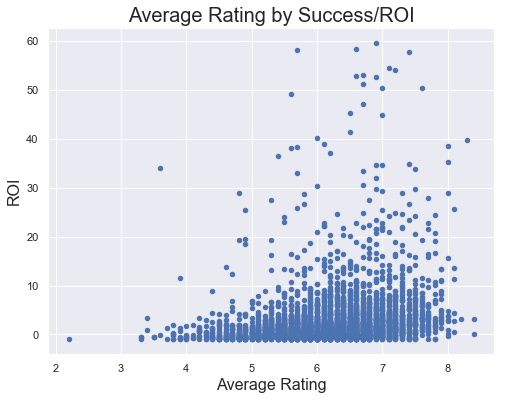

In [417]:
df_suc = df.query('success <= 60') # excluding the outliers
df_suc.plot(y='success', x='vote_average', kind='scatter', figsize=(8, 6))
plt.title('Average Rating by Success/ROI', fontdict={'fontsize': 20})
plt.xlabel('Average Rating', fontdict={'fontsize': 16})
plt.ylabel('ROI', fontdict={'fontsize': 16});

### Q1 Conclusion: 
From the visualizations, a <b>positive correlation between popularity and rating, aswell as between success and rating</b> can be seen.

## Drawing Conclusions, Communication of Results

### Q2 Do higher budgetary investments lead to higher roi succes rates?

This causality is difficult to prove, but a quick look at the scatterplot revealed some insights:

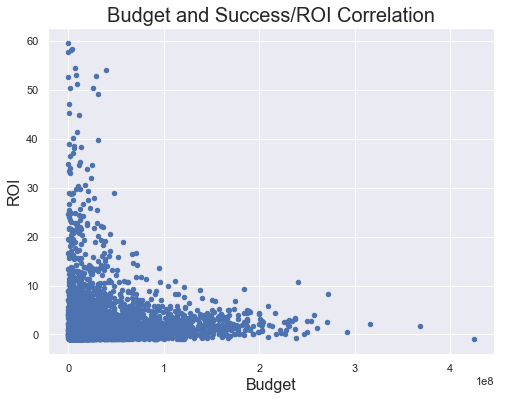

In [418]:
df_suc.plot(x='budget_adj', y='success', kind='scatter', figsize=(8, 6))
plt.title('Budget and Success/ROI Correlation', fontdict={'fontsize': 20})
plt.xlabel('Budget', fontdict={'fontsize': 16})
plt.ylabel('ROI', fontdict={'fontsize': 16});

Additionally I split the dataset by its median to further compare both the ROI of lower and higher budget movies:

In [419]:
# create the subsets for low and high budget
low = df[df['budget_adj'] < df['budget_adj'].median()]
high = df[df['budget_adj'] >= df['budget_adj'].median()]

In [420]:
# get the average roi for lower budget movies
low['success'].mean()

6.544250220048816

In [421]:
# get the average roi for higher budget movies
high['success'].mean()

1.9492803287747211

In [422]:
# determine the difference
low['success'].mean() - high['success'].mean()

4.594969891274095

### Q2 Conclusion: 
Higher budget do <b>not lead to higher ROIs</b>, because the visualization proves the opposite by showing, that lower budget movies have higher ROIs. <b>Higher budget movies have on average about 4.59 less ROI</b> than lower budget movies. An example for this phenomena is a lower budget movie receiving alot of buzz marketing and gaining increased revenues.

### Q3 Does the title length correlate to other properties?

It would be interesting to find out, whether the length of the movie title correlates to any other properties and what kind of influencation takes place. I therefore vizualized the correlations using a multidimensional scatterplot and included the linear regression line.

In [423]:
# creating a subset to investigate the means grouped by title lengths
grp_tit = df.query('tit_len <= 40').groupby('tit_len', as_index=False)['vote_average', 'success', 'budget_adj', 'popularity'].mean()

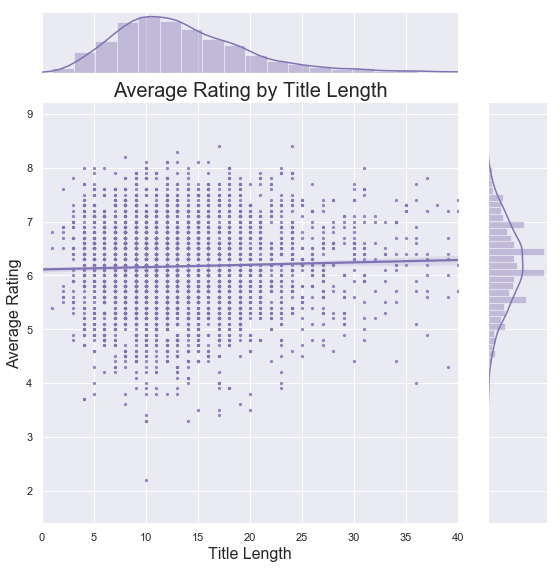

In [424]:
# visualize the dependencies of tit_len
g = sns.jointplot(x="tit_len", y="vote_average", data=df, space=0.5, kind="reg", xlim=(0, 40), color="m", height=8,  scatter_kws={"s": 5})
plt.title('Average Rating by Title Length', fontdict={'fontsize': 20})
plt.xlabel('Title Length', fontdict={'fontsize': 16})
plt.ylabel('Average Rating', fontdict={'fontsize': 16});

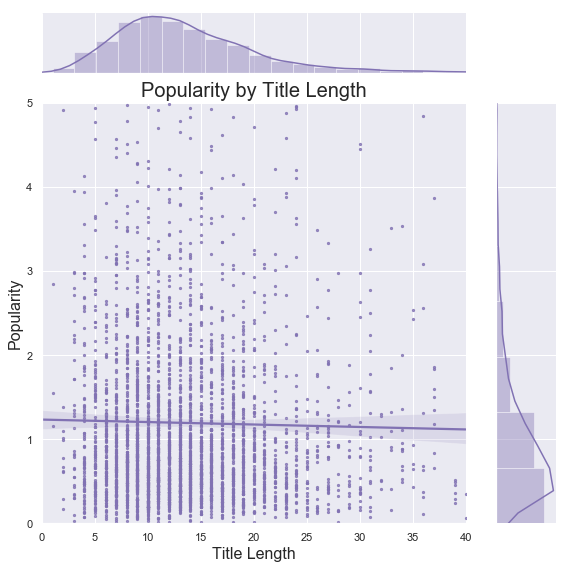

In [425]:
g = sns.jointplot(x="tit_len", y="popularity", data=df, space=0.5, kind="reg", xlim=(0, 40), ylim=(0, 5), color="m", height=8,  scatter_kws={"s": 5})
plt.title('Popularity by Title Length', fontdict={'fontsize': 20})
plt.xlabel('Title Length', fontdict={'fontsize': 16})
plt.ylabel('Popularity', fontdict={'fontsize': 16});

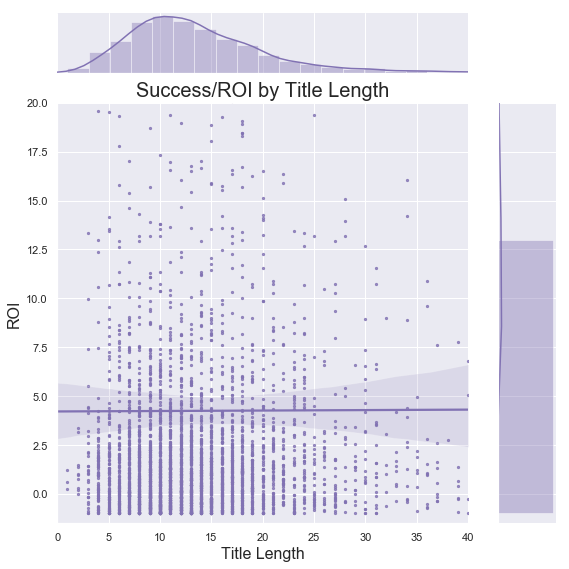

In [426]:
g = sns.jointplot(x="tit_len", y="success", data=df, space=0.5, kind="reg", xlim=(0, 40), ylim=(-1.5, 20), color="m", height=8,  scatter_kws={"s": 5})
plt.title('Success/ROI by Title Length', fontdict={'fontsize': 20})
plt.xlabel('Title Length', fontdict={'fontsize': 16})
plt.ylabel('ROI', fontdict={'fontsize': 16});

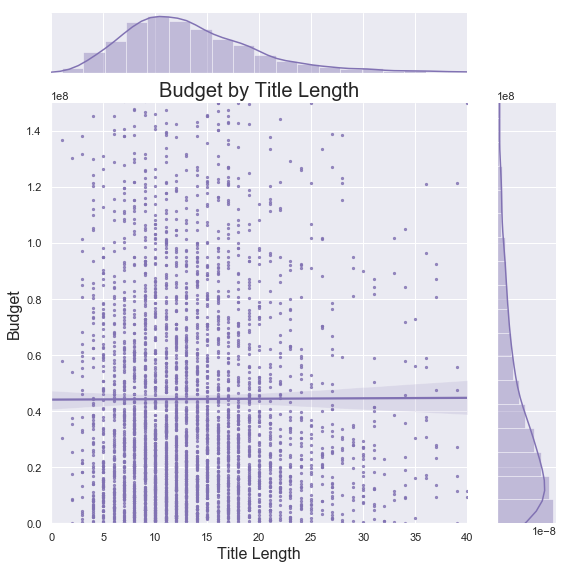

In [427]:
g = sns.jointplot(x="tit_len", y="budget_adj", data=df, space=0.5, kind="reg", xlim=(0, 40), ylim=(0, 150000000), color="m", height=8,  scatter_kws={"s": 5})
plt.title('Budget by Title Length', fontdict={'fontsize': 20})
plt.xlabel('Title Length', fontdict={'fontsize': 16})
plt.ylabel('Budget', fontdict={'fontsize': 16});

###  Q3 Conclusion: 
From the visualizations, <b>no significant correlations</b> could be found between the movie title's character length and other properties of the dataset.

### Q4 Do higher budget movies achieve higher ratings?

To answer this question, I created the budget averages of every rating category group and visualized them through barcharts:

In [428]:
# creating averages grouped by the rating categories
means = df.groupby('rating_cat')['budget_adj'].mean()
means

rating_cat
high         4.644408e+07
low          4.003830e+07
mediocre     4.572256e+07
very_high    4.353394e+07
Name: budget_adj, dtype: float64

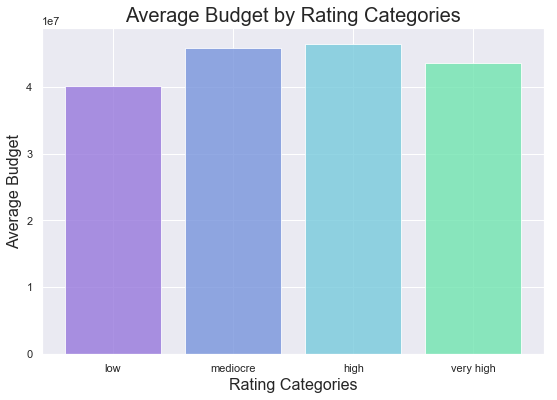

In [429]:
# Create a bar chart with proper labels
locations = [1,2,3,4]
heights = [means['low'], means['mediocre'], means['high'], means['very_high']]
labels = ['low', 'mediocre', 'high', 'very high']
plt.figure(figsize=(9, 6))
plt.bar(locations, heights, color=['#9677dc', '#7794dc', '#77cadc', '#70e4af'], alpha=.8, tick_label=labels)
plt.title('Average Budget by Rating Categories', fontdict={'fontsize': 20})
plt.xlabel('Rating Categories', fontdict={'fontsize': 16})
plt.ylabel('Average Budget', fontdict={'fontsize': 16});

### Q4 Conclusion: 
The chart indicates <b>minor differences</b> in the average budgets, while <b>mediocre and high rating categories contribute for higher average budgets</b> than low and very high ratings.

### Q5 Do higher ratings return higher success (ROI)?

What about the success/roi rate? The following inspects the average ROIs grouped by the rating classes:

In [430]:
# creating averages grouped by the rating categories
means = df_suc.groupby('rating_cat')['success'].mean()
means

rating_cat
high         2.575213
low          1.029168
mediocre     1.852741
very_high    4.739915
Name: success, dtype: float64

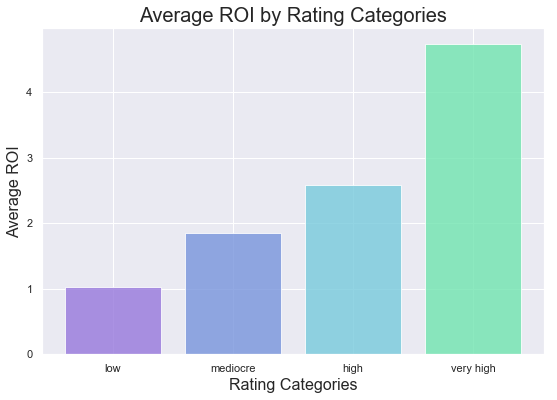

In [431]:
# Create a bar chart with proper labels
locations = [1,2,3,4]
heights = [means['low'], means['mediocre'], means['high'], means['very_high']]
labels = ['low', 'mediocre', 'high', 'very high']
plt.figure(figsize=(9, 6))
plt.bar(locations, heights, color=['#9677dc', '#7794dc', '#77cadc', '#70e4af'], alpha=.8, tick_label=labels)
plt.title('Average ROI by Rating Categories', fontdict={'fontsize': 20})
plt.xlabel('Rating Categories', fontdict={'fontsize': 16})
plt.ylabel('Average ROI', fontdict={'fontsize': 16});

### Q5 Conclusion: 
In this chart one can clearly see that <b>higher ratings correlate to high ROIs</b>. The average ROI for very high ratings is 4.74.

### Q6 What trends can be derived from the dataset regarding the movie runtime, success and movie quality (vote_average)?

To answer these question, the best practice is to create a subset grouped by years with averages of the analyzed features

In [432]:
# hiding the warnings for the following charts
import warnings
warnings.filterwarnings('ignore')

# Create a subset with averages grouped by year
avg_set = df.groupby('release_year', as_index=False)['runtime', 'success', 'vote_average'].mean()

Now the linear regressions on the scatter plots:

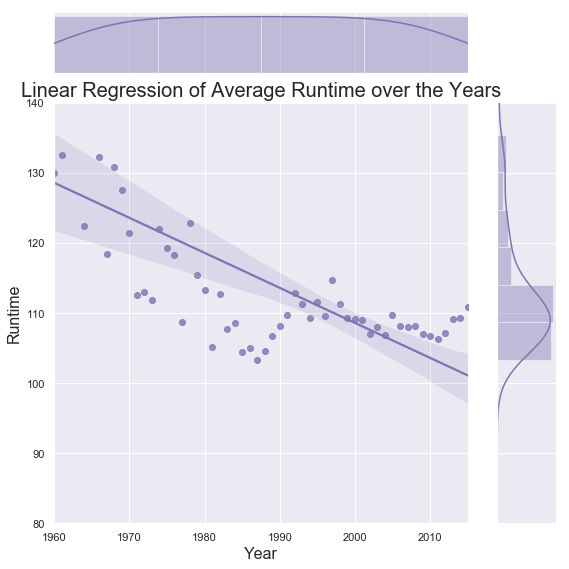

In [433]:
# Linear regression on average movie runtimes over the years
g = sns.jointplot(x="release_year", y="runtime", data=avg_set, space=0.5, kind="reg", ylim=(80, 140), xlim=(1960, 2015), color="m", height=8)
plt.title('Linear Regression of Average Runtime over the Years', fontdict={'fontsize': 20})
plt.xlabel('Year', fontdict={'fontsize': 16})
plt.ylabel('Runtime', fontdict={'fontsize': 16});

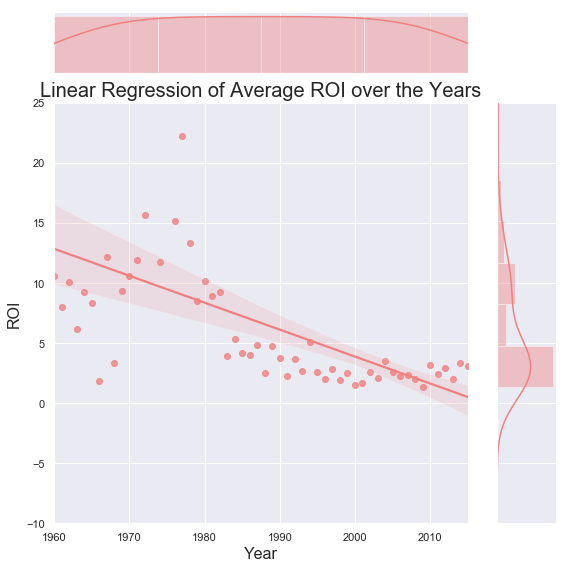

In [434]:
# Query the df for <= 150 succes rates to drop outliers
query = df.query('success <= 150') 
avg_suc = query.groupby('release_year', as_index=False)['success'].mean()

# Linear regression on average success (ROI) over the years
g = sns.jointplot(x="release_year", y="success", data=avg_suc, kind="reg", space=0.5, ylim=(-10, 25), xlim=(1960, 2015), color="#F08080", height=8)
plt.title('Linear Regression of Average ROI over the Years', fontdict={'fontsize': 20})
plt.xlabel('Year', fontdict={'fontsize': 16})
plt.ylabel('ROI', fontdict={'fontsize': 16});

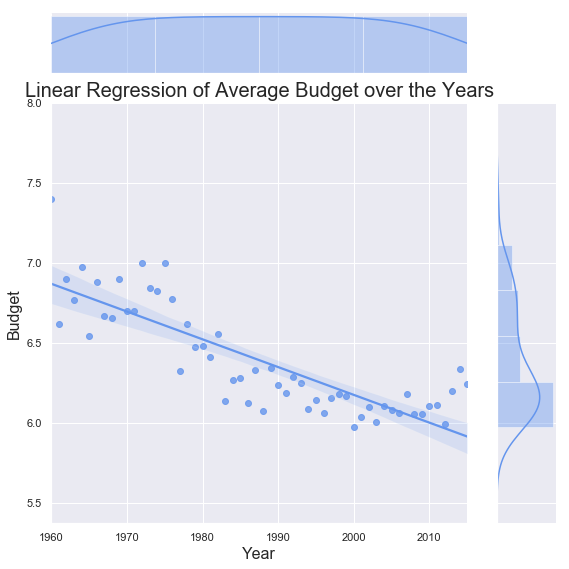

In [435]:
# Linear regression on average rating over the years
g = sns.jointplot(x="release_year", y="vote_average", data=avg_set, space=0.5, kind="reg", xlim=(1960, 2015), color="#6495ED", height=8)
plt.title('Linear Regression of Average Budget over the Years', fontdict={'fontsize': 20})
plt.xlabel('Year', fontdict={'fontsize': 16})
plt.ylabel('Budget', fontdict={'fontsize': 16});

### Q6 Conclusion:

The linear regression models on yearly averages of movie runtime, success, and vote_average cleary show a <b>constant decline over the last 55+ years in all examined properties</b>.

## Discussion and Conclusion

I assessed and analyzed the given TMDb dataset including over 10.000 movie enteries and their properties like budget, revenue, average viewer rating, and runtime dating between 1960 and 2015. The dataset has been cleaned and added new columns for success, title length (in characters), and rating groups (derived from vote_average).

The analysis showed, that a positive correlation between popularity and rating, aswell as between success and rating could be seen. The title length however had no significant correlations with other properties of the dataset. By dividing the dataset in the middle into high and low budget movies, I observed that lower budget movies have higher ROIs. Higher budget movies have on average about 4.59 less ROI than lower budget movies. An insprection of the ratings categories by budget and ROI revealed minor differences in the average budgets and strong positive correlations for the ROI. The average ROI for very high ratings (top 25%) is 4.74.

The last 55+ years reveal changing trends related to the average movie runtime, roi, and budget. According to the findings, the yearly average movie runtime, the yearly average roi, and the yearly average budget have all generally decreased.

The analysis of this dataset has been limited by a significant amount of missing or wrong values. Due to the changes that have been conducted to the budget and revenue columns, a majority of data have not been included in some of the analysis and visualizations. Also, some values in the popularity ratings were flawed and unproportional.